# Project Overview
This project involves Exploratory Data Analysis (EDA) on Superstore Sales data. The objective is to extract insights regarding sales trends, customer behavior, shipping preferences, and geographical performance.

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading

In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Superstore.csv', encoding='latin1')


# Dataset Overview

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Description:
1. **Row ID**: A unique identifier for each row in the dataset.  
2. **Order ID**: A unique identifier for each order.  
3. **Order Date**: The date when the order was placed.  
4. **Ship Date**: The date when the order was shipped.  
5. **Ship Mode**: The shipping method used for the order (e.g., Standard Class, First Class).  
6. **Customer ID**: A unique identifier for each customer.  
7. **Customer Name**: The full name of the customer who placed the order.  
8. **Segment**: The customer segment (e.g., Consumer, Corporate, Home Office).  
9. **Country**: The country where the order was shipped.  
10. **City**: The city where the order was shipped.  
11. **State**: The state where the order was shipped.  
12. **Postal Code**: The postal code of the shipping address.  
13. **Region**: The geographical region where the order was shipped (e.g., West, East).  
14. **Product ID**: A unique identifier for each product.  
15. **Category**: The high-level category of the product (e.g., Furniture, Office Supplies).  
16. **Sub-Category**: The sub-category of the product (e.g., Chairs, Paper).  
17. **Product Name**: The name of the product sold.  
18. **Sales**: The sales amount generated from the order.  
19. **Quantity**: The number of units of the product sold.  
20. **Discount**: The discount applied to the product in the order (in percentage).  
21. **Profit**: The profit earned from the product in the order (Sales - Cost).  



# Checking Null Values

In [7]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


**Insight:**
*   No missing values or duplicates in the dataset. Data quality is excellent.

In [8]:
# Converting 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

**Insights:**

Dates play a significant role in understanding sales trends and shipping delays. Time-based analysis can reveal seasonality or peak sales periods.



In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


# Description:

1. **Row ID**:  
   - Total rows: 9994.  
   - IDs range from 1 to 9994, evenly distributed with an average of 4997.5.  

2. **Order Date & Ship Date**:  
   - Orders span from Jan 3, 2014, to Dec 30, 2017.  
   - Shipments occur between Jan 7, 2014, and Jan 5, 2018.  
   - Average order date: April 30, 2016.  
   - Average shipping delay: ~3 days.  

3. **Postal Code**:  
   - Covers a wide range, from 1040 to 99301, with an average of 55190.  
   - High variability in postal codes due to broad geographic coverage.  

4. **Sales**:  
   - Sales range from 0.44 to 22,638.48, with an average of 229.86.  
   - Most sales are concentrated below 210.  
   - Significant variability in sales amounts.  

5. **Quantity**:  
   - Items sold per order range from 1 to 14, averaging 3.79.  
   - Most orders involve 2 to 5 items.  

6. **Discount**:  
   - Discounts range from 0% to 80%, averaging 15.6%.  
   - Majority of orders have discounts of 0% or 20%.  

7. **Profit**:  
   - Profits range from a loss of -6599.98 to a gain of 8399.98, with an average profit of 28.66.  
   - Most profits are small, often near 0.  
   - High variability in profit due to diverse product pricing and costs.  


# Cleaning of Data

In [11]:
df.duplicated().sum()

0

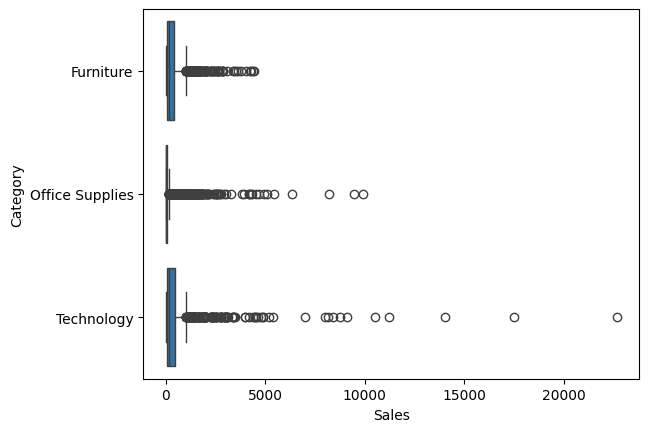

In [12]:
#checking Outliers
sns.boxplot(x=df['Sales'],y=df["Category"])
plt.show()

**Analysis:**


*   Outliers exist in Sales, especially for categories like Furniture and Technology.
*   Boxplots identify extreme values that can impact statistical analysis.

**Insights:**

While outliers indicate some high-value sales, they also suggest potential anomalies that require deeper analysis.



# Customer Analysis


In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:
type_of_customers=df['Segment'].unique()
type_of_customers

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [15]:
number_of_customers=df['Segment'].value_counts()
number_of_customers

,count
Segment,
Consumer,5191
Corporate,3020
Home Office,1783


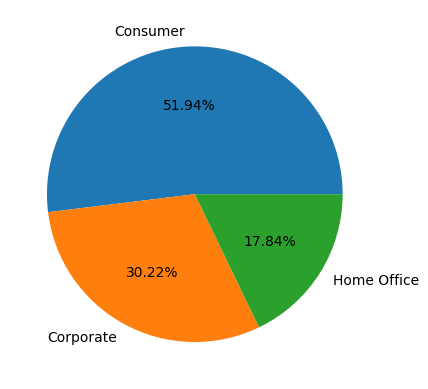

In [16]:
plt.pie(number_of_customers,labels=type_of_customers,autopct='%1.2f%%')
plt.show()

In [17]:
sales_per_category=df.groupby('Segment')['Sales'].sum()
sales_per_category = sales_per_category.rename('Total sales')
sales_per_category

,Total sales
Segment,
Consumer,1.161401e+06
Corporate,7.061464e+05
Home Office,4.296531e+05


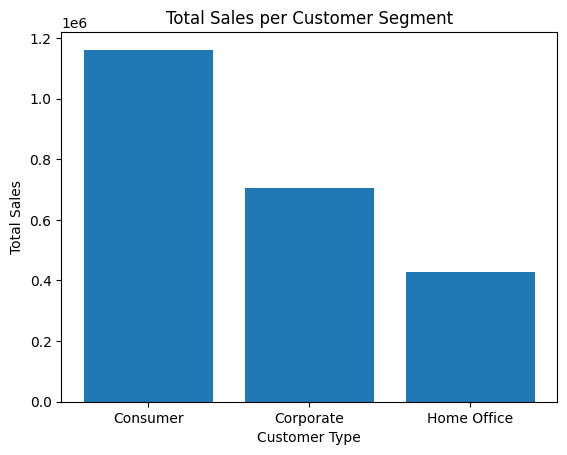

In [18]:
plt.bar(sales_per_category.index, sales_per_category.values)
plt.xlabel("Customer Type")
plt.ylabel("Total Sales")
plt.title("Total Sales per Customer Segment")
plt.show()

**Analysis:**

*   Consumers:52%
*   Corporate:30%
*   Home Office:18%

**Insights:**

The Consumer Segment is the largest contributor to the business, indicating a B2C-focused model. Strategies targeting Consumers could yield higher profits.








# **Mode of Shipping**

In [19]:
_Type_of_ship=df['Ship Mode'].unique()
_Type_of_ship

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [20]:
shipping_mode=df['Ship Mode'].value_counts()
shipping_mode

,count
Ship Mode,
Standard Class,5968
Second Class,1945
First Class,1538
Same Day,543


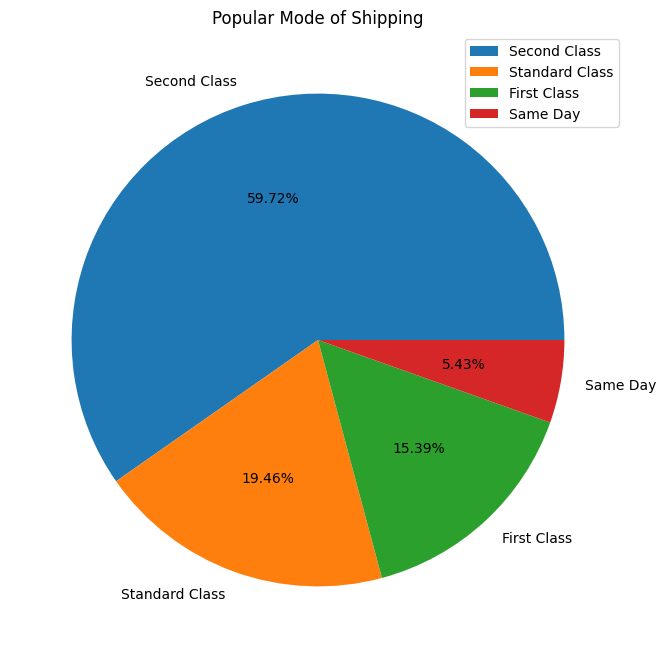

In [63]:
plt.figure(figsize=(8,8))
plt.pie(shipping_mode,labels=_Type_of_ship,autopct='%1.2f%%')
plt.title("Popular Mode of Shipping")
plt.legend(labels=_Type_of_ship, loc='upper right')
plt.show()

**Analysis:**


*   Standard Class accounts for 60% of orders, followed by Second Class (20%).
*   Same Day shipping is minimal (~5%).

**Insights:**

Most customers opt for Standard Class shipping, likely due to its cost-effectiveness. Same Day shipping could be promoted for urgent orders.





# **Geographical Analysis**

In [21]:
state=df['State'].value_counts()
state=state.rename('Total Customers')
state.head(10)

,Total Customers
State,
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255


<ipython-input-22-f5c978f0a119>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state.index, y=state.values ,palette='rocket')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, 'California'),
  Text(1, 0, 'New York'),
  Text(2, 0, 'Texas'),
  Text(3, 0, 'Pennsylvania'),
  Text(4, 0, 'Washington'),
  Text(5, 0, 'Illinois'),
  Text(6, 0, 'Ohio'),
  Text(7, 0, 'Florida'),
  Text(8, 0, 'Michigan'),
  Text(9, 0, 'North Carolina'),
  Text(10, 0, 'Arizona'),
  Text(11, 0, 'Virginia'),
  Text(12, 0, 'Georgia'),
  Text(13, 0, 'Tennessee'),
  Text(14, 0, 'Colorado'),
  Text(15, 0, 'Indiana'),
  Text(16, 0, 'Kentucky'),
  Text(17, 0, 'Massachusetts'),
  Text(18, 0, 'New Jersey'),
  Text(19, 0, 'Oregon'),
  Text(20, 0, 'Wisconsin'),
  Text(21, 0, 'Maryland'),
  Text(22, 0, 'Delaware'),
  Text(23, 0, 'Minnesota'),
  Text(24, 0, 'Connecticut'),
  Text(25, 0, 'Oklahoma'),
  Text(26

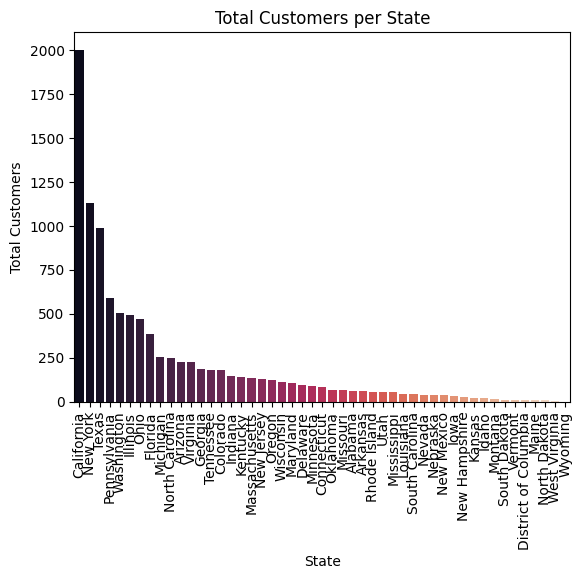

In [22]:
sns.barplot(x=state.index, y=state.values ,palette='rocket')
plt.xlabel("State")
plt.ylabel("Total Customers")
plt.title("Total Customers per State")
plt.xticks(rotation=90)

In [23]:
#customer by city
city=df['City'].value_counts()
city=city.rename('Total Customers')
city.head(10)

,Total Customers
City,
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Seattle,428
Houston,377
Chicago,314
Columbus,222
San Diego,170


In [24]:
#Grouping of data by states with sales
states_per_sales=df.groupby('State')['Sales'].sum()
states_per_sales = states_per_sales.rename('Total sales')
top_states_sales=states_per_sales.sort_values(ascending=False)
top_states_sales.head(10)

,Total sales
State,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140
Florida,89473.7080
Illinois,80166.1010
Ohio,78258.1360
Michigan,76269.6140


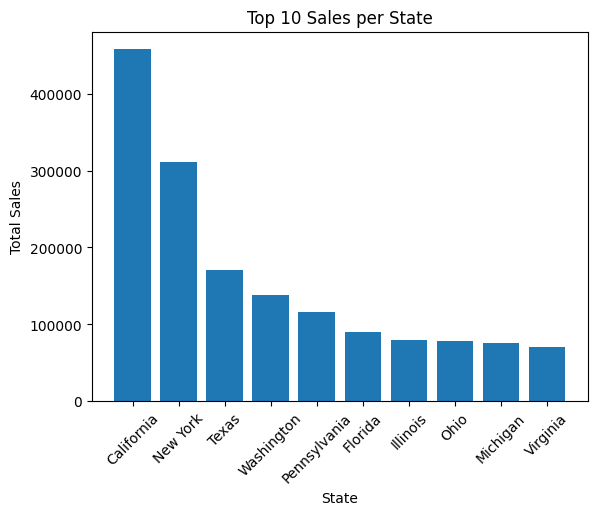

In [25]:
plt.bar(top_states_sales.index[:10], top_states_sales.values[:10])
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.title("Top 10 Sales per State")
plt.xticks(rotation=45)
plt.show()

In [26]:
city_per_sales=df.groupby('City')['Sales'].sum()
city_per_sales = city_per_sales.rename('Total sales')  #Rename the series itself
top_city_sales=city_per_sales.sort_values(ascending=False)
top_city_sales.head(10)

,Total sales
City,
New York City,256368.1610
Los Angeles,175851.3410
Seattle,119540.7420
San Francisco,112669.0920
Philadelphia,109077.0130
Houston,64504.7604
Chicago,48539.5410
San Diego,47521.0290
Jacksonville,44713.1830


<ipython-input-59-0cfab57a72fa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_city_sales.index[:10], y=top_city_sales.values[:10],palette='hls')


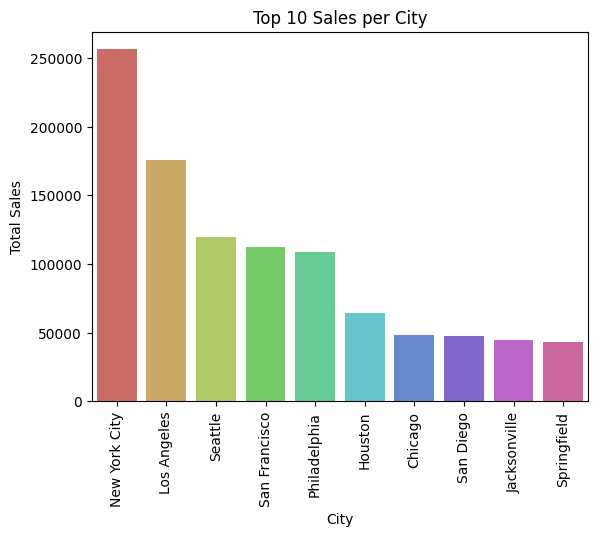

In [59]:
sns.barplot(x=top_city_sales.index[:10], y=top_city_sales.values[:10],palette='hls')
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.title("Top 10 Sales per City")
plt.xticks(rotation=90)
plt.show()

**Analysis:**


*   Top States: California, New York, and Texas dominate customer counts and sales.
*   Top Cities: New York City, Los Angeles, and Seattle are major sales hubs.

**Insights:**

Geographical focus should be on high-performing states and cities to maximize returns. California leads in both customer count and sales.



# **Product Category Analysis**

In [28]:
#types of product categories
product_categories=df['Category'].unique()
print(product_categories)

['Furniture' 'Office Supplies' 'Technology']


In [29]:
#grouping data by product category
subcategory_count=df.groupby('Category')['Sub-Category'].nunique()
subcategory_count=subcategory_count.sort_values(ascending=False)
subcategory_count

,Sub-Category
Category,
Office Supplies,9
Furniture,4
Technology,4


In [30]:
#sales by category
sales_per_category=df.groupby('Category')['Sales'].sum()
sales_per_category = sales_per_category.rename('Total sales')
sales_per_category

,Total sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


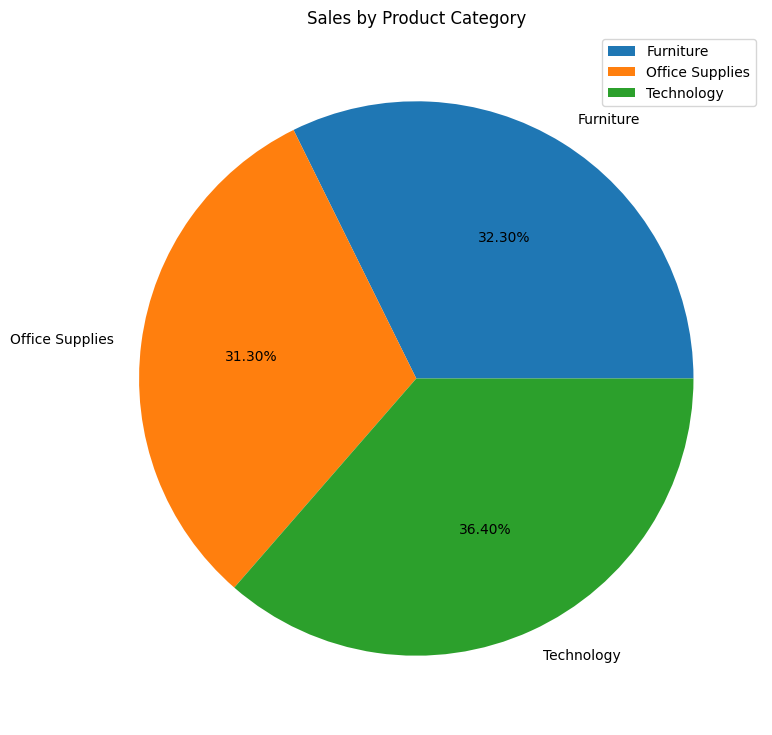

In [57]:
plt.figure(figsize=(9,9))
plt.pie(sales_per_category,labels=product_categories,autopct='%1.2f%%')
plt.title("Sales by Product Category")
plt.legend(labels=product_categories, loc='best')
plt.show()

In [32]:
#grouping subcategory by sales
subcategory_sales=df.groupby('Sub-Category')['Sales'].sum()
subcategory_sales = subcategory_sales.rename('Total sales')
subcategory_sales=subcategory_sales.sort_values(ascending=False)
subcategory_sales

,Total sales
Sub-Category,
Phones,330007.0540
Chairs,328449.1030
Storage,223843.6080
Tables,206965.5320
Binders,203412.7330
Machines,189238.6310
Accessories,167380.3180
Copiers,149528.0300
Bookcases,114879.9963


<ipython-input-33-d250dce3f661>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcategory_sales.index, y=subcategory_sales.values,palette='viridis')


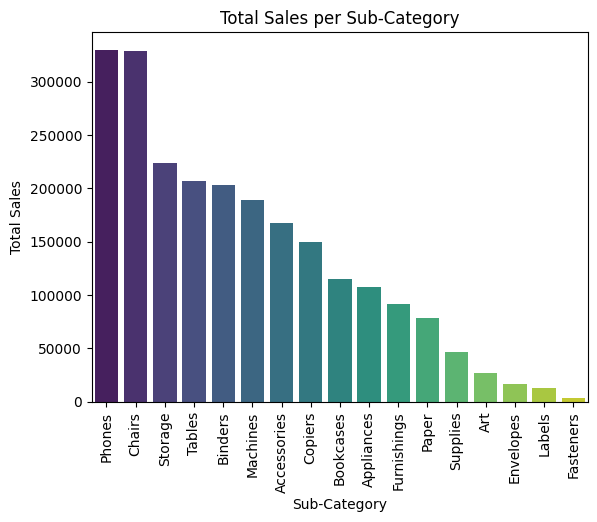

In [33]:
sns.barplot(x=subcategory_sales.index, y=subcategory_sales.values,palette='viridis')
plt.xlabel("Sub-Category")
plt.ylabel("Total Sales")
plt.title("Total Sales per Sub-Category")
plt.xticks(rotation=90)
plt.show()

**Analysis:**

*   Top Category: Technology (highest sales).
*   Top Sub-Categories: Phones, Chairs, and Storage.

**Insights:**

Investing in Technology products, especially Phones, will drive higher revenue. Office Supplies contribute significantly to sales volume but at lower margins.





In [34]:
Top_products=df.groupby('Product Name')['Sales'].sum()
Top_products=Top_products.sort_values(ascending=False)
Top_products.head(10)

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


<ipython-input-58-9abcd174f2b1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_products.index[:10], y=Top_products.values[:10],palette='cool')


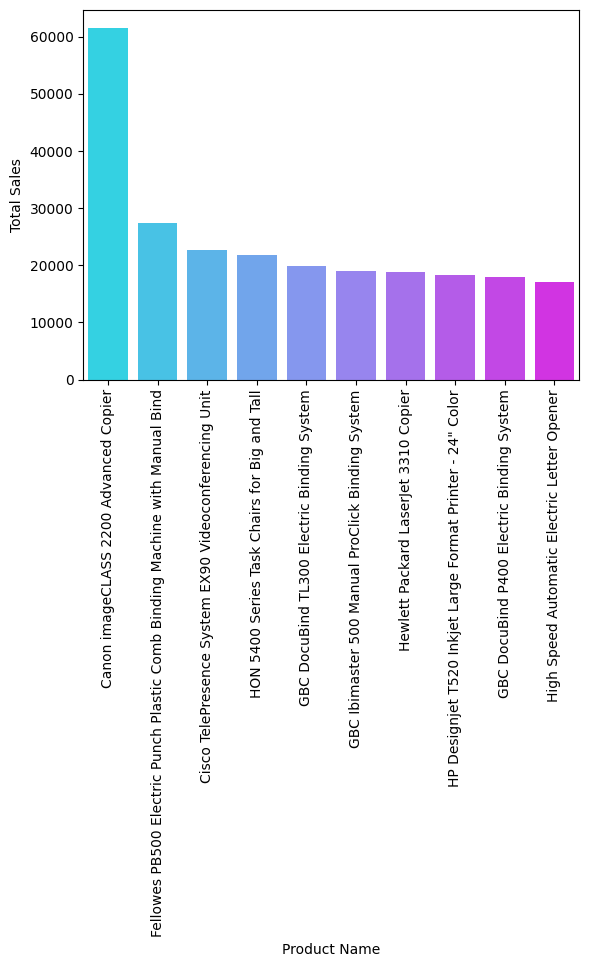

In [58]:
sns.barplot(x=Top_products.index[:10], y=Top_products.values[:10],palette='cool')
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

**Analysis:**

*   Canon imageCLASS Copier is the highest revenue generator.
*   Binding Machines and Office Chairs also perform well.

**Insights:**

Promoting high-performing products like Canon Copiers can boost profits. Bundling products (e.g., copiers + accessories) can enhance sales.



# **Region with Sales**

<ipython-input-36-1b017fa00977>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x="Region",y="Sales",palette="Blues_d")


<Axes: xlabel='Region', ylabel='Sales'>

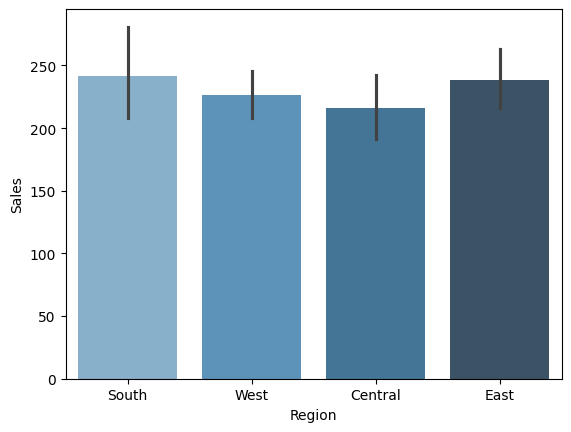

In [36]:
sns.barplot(data=df,x="Region",y="Sales",palette="Blues_d")

**Analysis:**

*  West region leads in sales, followed by East and Central regions.
*   South region has the lowest sales.

**Insights:**

Focus on underperforming regions like South by introducing promotions, discounts, or tailored strategies.





# **Customer Analysis**

In [37]:
df["Customer Name"].value_counts()

,count
Customer Name,
William Brown,37
John Lee,34
Matt Abelman,34
Paul Prost,34
Chloris Kastensmidt,32
...,...
Lela Donovan,1
Anthony O'Donnell,1
Carl Jackson,1


In [38]:
Top_customers=df.groupby('Customer Name')['Sales'].sum()
Top_customers=Top_customers.sort_values(ascending=False)
Top_customers.head(10)

,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
Ken Lonsdale,14175.229
Sanjit Chand,14142.334
Hunter Lopez,12873.298
Sanjit Engle,12209.438


<ipython-input-39-409797865644>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_customers.index[:10], y=Top_customers.values[:10],palette='rocket')


Text(0.5, 1.0, 'Top 10 Customers')

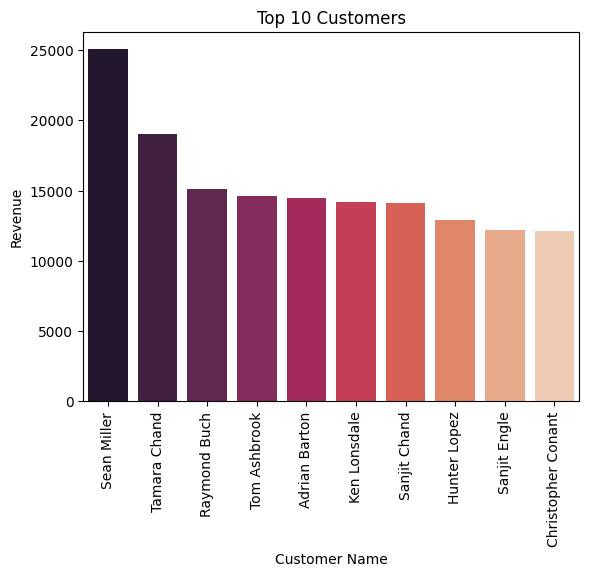

In [39]:
sns.barplot(x=Top_customers.index[:10], y=Top_customers.values[:10],palette='rocket')
plt.xlabel("Customer Name")
plt.ylabel("Revenue")
plt.xticks(rotation=90)
plt.title("Top 10 Customers")

**Analysis:**

* Customers like William Brown and John Lee place the most orders.




# **Sales by Annualy**

In [40]:
#grouping sales by year
sales_per_year=df.groupby(df['Order Date'].dt.year)['Sales'].sum()
sales_per_year = sales_per_year.rename('Total sales')
sales_per_year=sales_per_year.sort_values(ascending=False)
sales_per_year

,Total sales
Order Date,
2017,733215.2552
2016,609205.5980
2014,484247.4981
2015,470532.5090


Text(0.5, 1.0, 'Total Sales per Year')

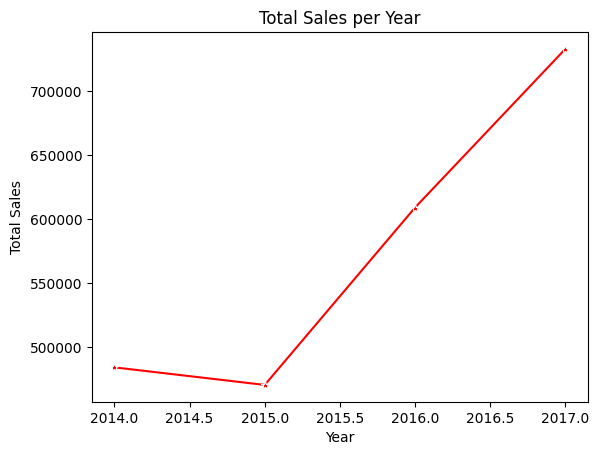

In [41]:
sns.lineplot(x=sales_per_year.index, y=sales_per_year.values,color='red',marker='*')
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Total Sales per Year")

**Insights:**

*   Sales peak during December (holiday season) and August (back-to-school season).
*   Seasonality affects sales, and targeted promotions can maximize revenue.



# Final Insights:

*   Consumer Segment and Standard Class Shipping dominate the dataset.
*   Top States: California, New York, and Texas.
*   Top Category: Technology, with Phones leading in sales.
*   Regions: The West performs best, while the South lags behind.
*   Sales show strong seasonality, peaking in December and August.

# Conclusion:

This EDA provides valuable insights into sales performance, customer behavior, and product trends. Businesses can use these insights for:



*   Regional and customer-focused marketing.
*   Product promotion strategies.
*   Improving supply chain efficiency









